In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib import font_manager, rc
import numpy as np
import csv
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge # 릿지회귀

In [2]:
# 한글 폰트 적용 - 한글깨짐 방지
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# csv 파일 읽어와서 데이터프레임에 저장
df_source = pd.read_csv('NHIS_OPEN_GJ_2017_3.csv', encoding='cp949')
df_source = df_source.drop_duplicates() # 중복값 제거
df_source = df_source.dropna() # 결측값 제거
df_source

,Unnamed: 0,번호,성별,연령,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,총콜레스테롤,흡연상태,음주여부
0,0,1,1,40,170,75,90.0,120.0,80.0,99.0,193.0,1.0,1.0
1,1,2,1,35,180,80,89.0,130.0,82.0,106.0,228.0,3.0,0.0
2,2,3,1,45,165,75,91.0,120.0,70.0,98.0,136.0,1.0,0.0
3,3,4,1,55,175,80,91.0,145.0,87.0,95.0,201.0,1.0,0.0
4,4,5,1,55,165,60,80.0,138.0,82.0,101.0,199.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199772,199772,199996,1,45,170,100,107.0,135.0,88.0,112.0,247.0,3.0,1.0
199773,199773,199997,2,30,155,45,63.0,107.0,61.0,83.0,151.0,1.0,1.0
199774,199774,199998,1,55,160,70,91.0,100.0,76.0,100.0,222.0,1.0,0.0
199775,199775,199999,1,40,170,75,88.2,147.0,89.0,81.0,125.0,3.0,1.0


In [8]:
del x, y, x_train, x_test, y_train, y_test, lr #메모리 반환, 초기화

In [9]:
# 이번에는 다른 특성을 사용하였다
#체중 특성과 신장 특성을 적용
x = df_source[['체중']]
y = df_source['신장']

# 훈련, 테스트 셋 분리
# test_size=0.3으로 설정하여 훈련:테스트 비율을 7:3으로
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [10]:
lr = Ridge() # 선형회귀 모델 생성
lr = lr.fit(x_train, y_train)

# 테스트 셋 정확도 
test_pred = lr.predict(x_test)
accuracy = float(lr.score(x_test, y_test))
print('테스트 셋 정확도: %.4f' %accuracy)

# 훈련 셋 정확도 
train_pred = lr.predict(x_train)
accuracy = float(lr.score(x_train, y_train))
print('훈련 셋 정확도: %.4f' %accuracy)

테스트 셋 정확도: 0.4415
훈련 셋 정확도: 0.4461


In [12]:
#특성을 달리한 결과 이전과 비교하여 정확도가 높아졌다. 특성에 따라 결과가 달라짐을 확인할 수 있다

Text(0.5, 1.0, '릿지 회귀 훈련 데이터 예측')

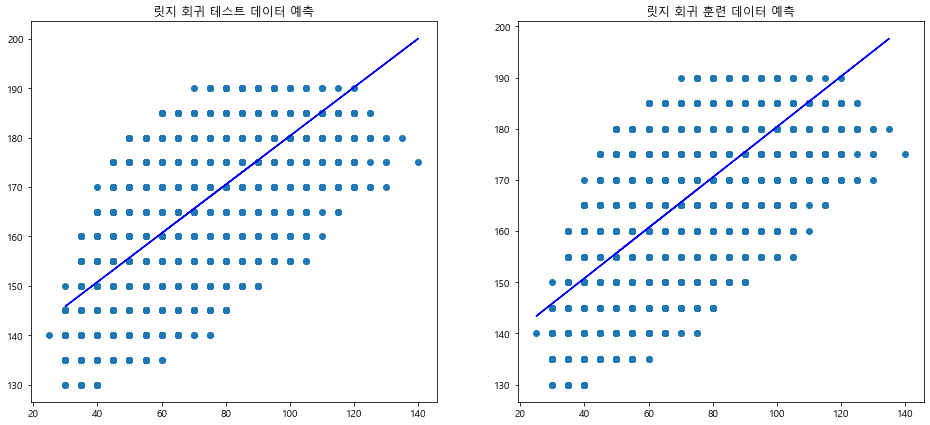

In [11]:
# 그래프로 나타내기
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
x = np.array(x)
ax[0].scatter(x, y)
ax[0].plot(x_test, test_pred, color='b')
ax[0].set_title('릿지 회귀 테스트 데이터 예측')
ax[1].scatter(x, y)
ax[1].plot(x_train, train_pred, color='b')
ax[1].set_title('릿지 회귀 훈련 데이터 예측')

In [12]:
# 이전과 비교하여 선형회귀 선이 더욱 가운데 부분에 가깝게 그려짐을 확인할 수 있다

In [13]:
del x, y, x_train, x_test, y_train, y_test, lr #메모리 반환, 초기화

In [16]:
#이번에는 데이터를 평균0, 분산1로 표준화 한 후 알고리즘을 실행해본다

x = df_source[['체중']]
y = df_source[['신장']]
             
# 훈련, 테스트 셋 분리
# test_size=0.3으로 설정하여 훈련:테스트 비율을 7:3으로
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 표준화 전처리 적용 후 알고리즘 결과 구현
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaler = scaler.transform(x_train)
x_train_scaler = pd.DataFrame(x_train_scaler, columns = x_train.columns) # 표준화를 적용한 이후 다시 컬럼명을 지정해야 한다 

del scaler
scaler = StandardScaler()
scaler.fit(x_test)
x_test_scaler = scaler.transform(x_test)
x_test_scaler = pd.DataFrame(x_test_scaler, columns = x_test.columns)

del scaler
scaler = StandardScaler()
scaler.fit(y_train)
y_train_scaler = scaler.transform(y_train)
y_train_scaler = pd.DataFrame(y_train_scaler, columns = y_train.columns)

del scaler
scaler = StandardScaler()
scaler.fit(y_test)
y_test_scaler = scaler.transform(y_test)
y_test_scaler = pd.DataFrame(y_test_scaler, columns = y_test.columns)

In [17]:
lr = Ridge() # 선형회귀 모델 생성
lr = lr.fit(x_train_scaler, y_train_scaler)

# 테스트 셋 정확도 
test_pred = lr.predict(x_test_scaler)
accuracy = float(lr.score(x_test_scaler, y_test_scaler))
print('테스트 셋 정확도: %.4f' %accuracy)

# 훈련 셋 정확도 
train_pred = lr.predict(x_train_scaler)
accuracy = float(lr.score(x_train_scaler, y_train_scaler))
print('훈련 셋 정확도: %.4f' %accuracy)

테스트 셋 정확도: 0.4415
훈련 셋 정확도: 0.4461


In [18]:
# 데이터를 표준화 한 결과 이전과 큰 차이가 없다

Text(0.5, 1.0, '선형 회귀 훈련 데이터 예측')

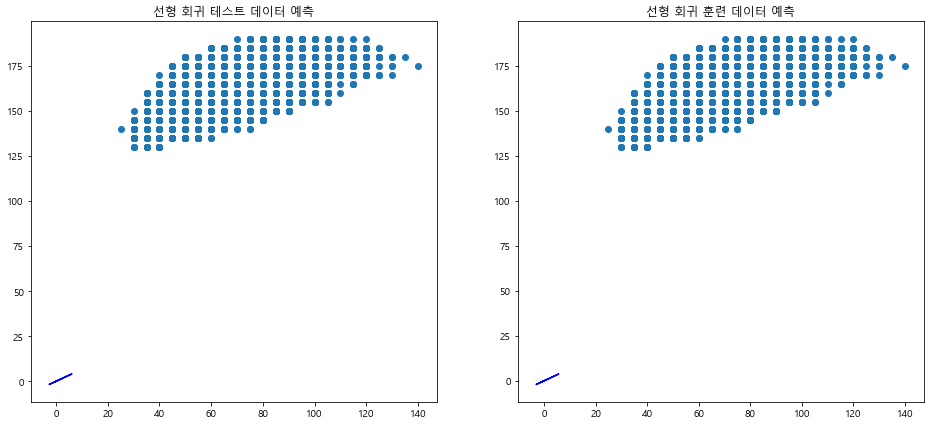

In [19]:
# 그래프로 나타내기
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
x = np.array(x)
ax[0].scatter(x, y)
ax[0].plot(x_test_scaler, test_pred, color='b')
ax[0].set_title('선형 회귀 테스트 데이터 예측')
ax[1].scatter(x, y)
ax[1].plot(x_train_scaler, train_pred, color='b')
ax[1].set_title('선형 회귀 훈련 데이터 예측')

In [20]:
# 데이터를 표준화 한 후 선형회귀 선을 그리면 이전과는 달리 선이 완전히 빈공강 위치에 그려진다

In [25]:
del x, y, x_train, x_test, y_train, y_test, lr #메모리 반환, 초기화

In [26]:
# 이번에는 다른 특성을 사용하였다
#체중 특성과 신장 특성을 적용
x = df_source[['체중']]
y = df_source['신장']

# 훈련, 테스트 셋 분리
# test_size=0.3으로 설정하여 훈련:테스트 비율을 7:3으로
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [27]:
#이번에는 alpha값을 100으로 늘려서 계수를 0에 더 가깝게 해보자. 기본값은 1로 지정된다
lr = Ridge(alpha=100) # 선형회귀 모델 생성
lr = lr.fit(x_train, y_train)

# 테스트 셋 정확도 
test_pred = lr.predict(x_test)
accuracy = float(lr.score(x_test, y_test))
print('테스트 셋 정확도: %.4f' %accuracy)

# 훈련 셋 정확도 
train_pred = lr.predict(x_train)
accuracy = float(lr.score(x_train, y_train))
print('훈련 셋 정확도: %.4f' %accuracy)

테스트 셋 정확도: 0.4415
훈련 셋 정확도: 0.4461


In [28]:
#alpha 값을 100으로 증가해도 결과는 이전과 똑같다

In [29]:
del x, y, x_train, x_test, y_train, y_test, lr #메모리 반환, 초기화

In [30]:
# 이번에는 다른 특성을 사용하였다
#체중 특성과 신장 특성을 적용
x = df_source[['체중']]
y = df_source['신장']

# 훈련, 테스트 셋 분리
# test_size=0.3으로 설정하여 훈련:테스트 비율을 7:3으로
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [31]:
#이번에는 alpha값을 0.01으로 감소하여 실행해보자. 기본값은 1로 지정된다
lr = Ridge(alpha=0.01) # 선형회귀 모델 생성
lr = lr.fit(x_train, y_train)

# 테스트 셋 정확도 
test_pred = lr.predict(x_test)
accuracy = float(lr.score(x_test, y_test))
print('테스트 셋 정확도: %.4f' %accuracy)

# 훈련 셋 정확도 
train_pred = lr.predict(x_train)
accuracy = float(lr.score(x_train, y_train))
print('훈련 셋 정확도: %.4f' %accuracy)

테스트 셋 정확도: 0.4415
훈련 셋 정확도: 0.4461


In [32]:
# alpha값을 0.01로 감소시켜도 결과가 같았다

In [33]:
del x, y, x_train, x_test, y_train, y_test, lr #메모리 반환, 초기화

In [34]:
del df_source